# 2.3  Global optimization methods

- In this Section we describe the first approach one might take to approximately minimize an arbitrary function: evaluate the function using a large number of input points and treat the input that provides the lowest function value as the approximate global minimum of the function.  


- This idea mimics how we as humans might find the approximate minimum of a function 'by eye' - i.e., by drawing it and visually identifying its lowest point.  

- While easy to implement and perfectly adequate for functions having low-dimensional input, this naturally zero-order framework fails miserably when the input dimension of a function grows to even moderate size.  


- This happens essentially for the same reason our ability to visually identify an approximate minimum of a function fails once the input size is greater than 2 or 3: the number of inputs to examine simply becomes infeasible.

- You can toggle the code on and off in this presentation via the button below.

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
## This code cell will not be shown in the HTML version of this notebook
# imports from custom library
import sys
sys.path.append('../../')
import matplotlib.pyplot as plt
from mlrefined_libraries import basics_library as baslib
from mlrefined_libraries import calculus_library as calib
from mlrefined_libraries import math_optimization_library as optlib
import autograd.numpy as np

# This is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

## Choosing input points

- To determine the smallest point of a function taking in one or two inputs we - as humans - can simply draw the function and determine 'by eye' where the smallest point lies.  


- We can mimic this visual approach by simply evaluating a function over a large number of its input points and designating the input that provides the smallest result as our approximate global minimum.  


- This approach is called a *global optimization method*.  


- How do we choose the inputs to try out with a generic function?  

- We clearly cannot try them all - even for a single-input function - since there are (technically speaking) an infinite number of points to try for any continuous function.  


- So - as one might guess - we can take two approaches to choosing our (finite) set of input points to test: we can sample them *uniformly* over an evenly spaced grid, or pick the same number of input points at random.  


- We illustrate both choices in the example below.

#### <span style="color:#a50e3e;">Example. </span> Evaluating a quadratic to determine its minimum

- Here we illustrate two sampling methods for finding the global minimum of simple 2-d and 3-d quadratic functions

\begin{array}
\
g(w) = w^2 + 0.2\\
g(w_1,w_2) = w_1^2 + w_2^2 + 0.2
\end{array}



- The former has global minimum at $w = 0$, and the latter at $\mathbf{w} =\begin{bmatrix} w_1 \\ w_2  \end{bmatrix} =  \begin{bmatrix} 0 \\ 0  \end{bmatrix}$.  

- In the top two panels we illustrate how to *evenly sample* the input of each function


- In the bottom two panels we randomly sample (uniformly at random on the interval $[-1,1]$ in each input axis) 

<IPython.core.display.Javascript object>


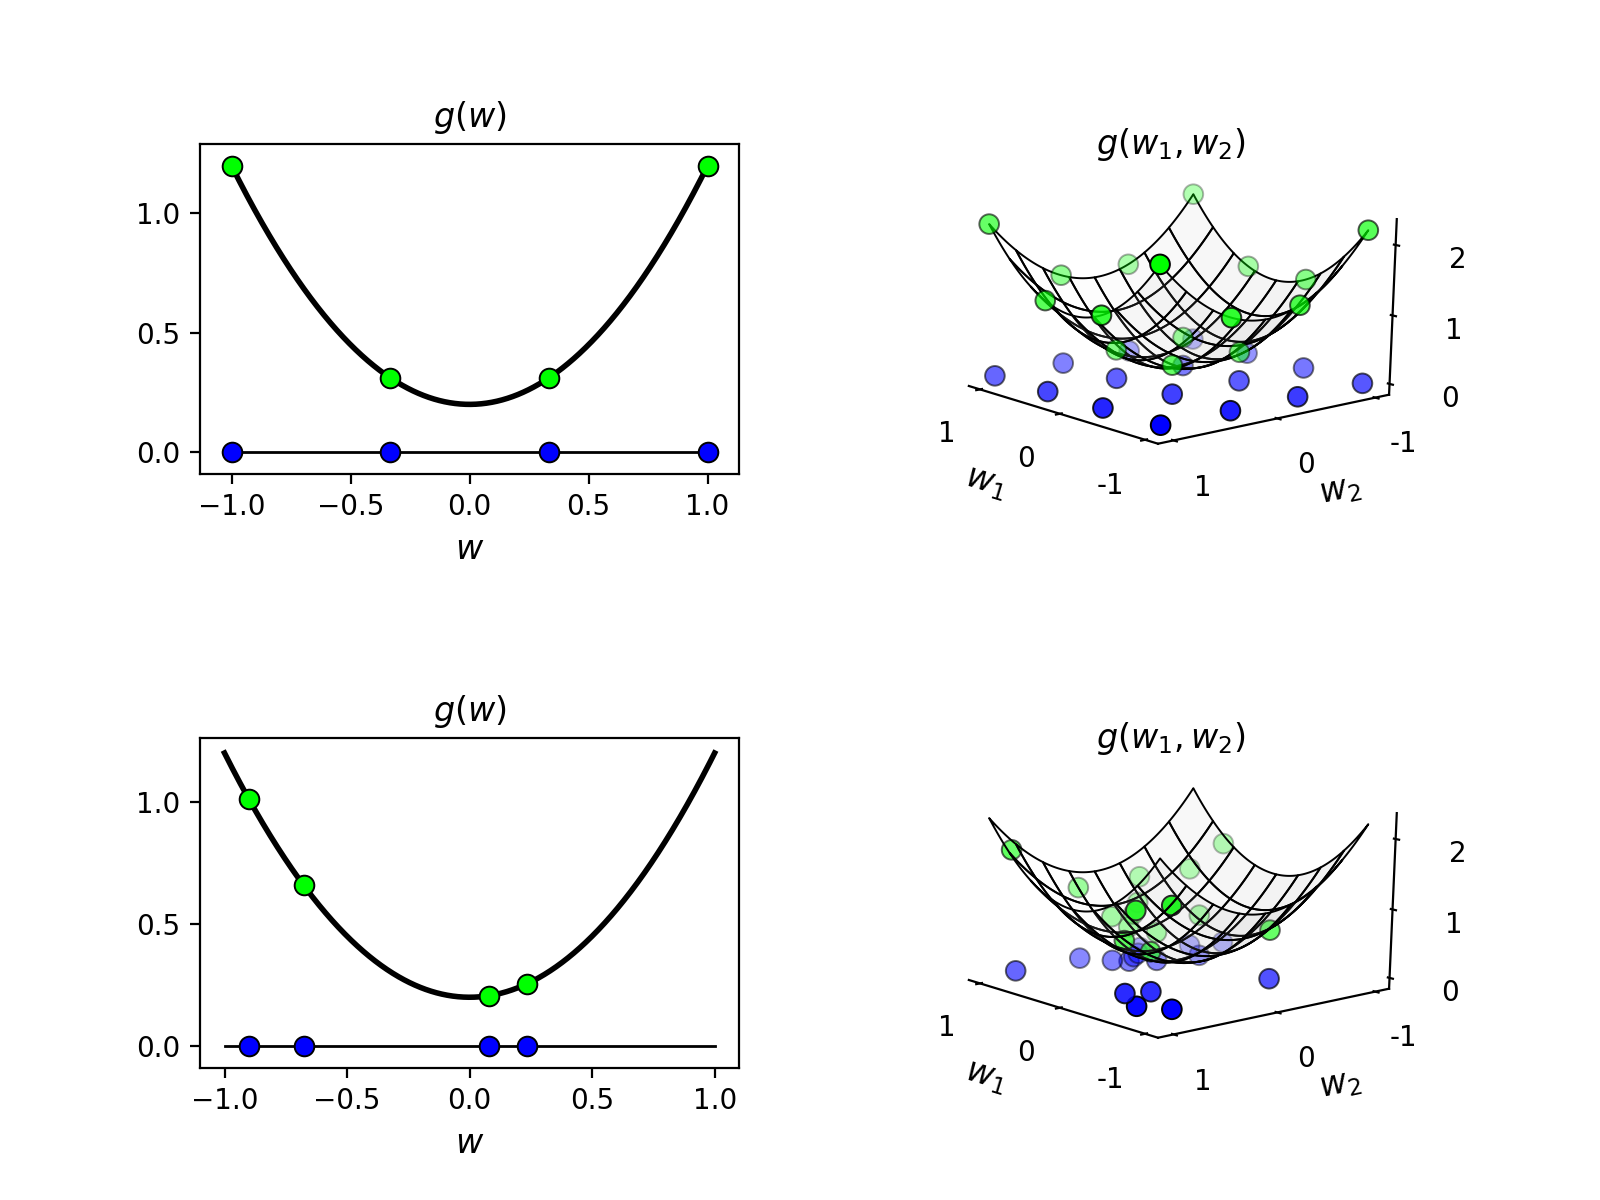

In [2]:
# This code cell will not be shown in the HTML version of this notebook
# define function
func = lambda w: np.dot((w-0).T,(w-0)) + 0.2
num_samples = 4
view = [20,140]

# plot 2d and 3d version, with even grid and randomly selected points
optlib.random_method_experiments.double_plot(func,num_samples,view = view)

- If we take enough samples we could certainly find an input very close to the true global minimum of either function.  


- For example if we run this experiment again using 20 samples for the 2-d quadratic, and 400 samples for the 3-d quadratic (so that we are sampling with a $20\times 20$ grid in the case of even sampling), using either approach we are able to find either the global minimum or a point very close to it.

<IPython.core.display.Javascript object>


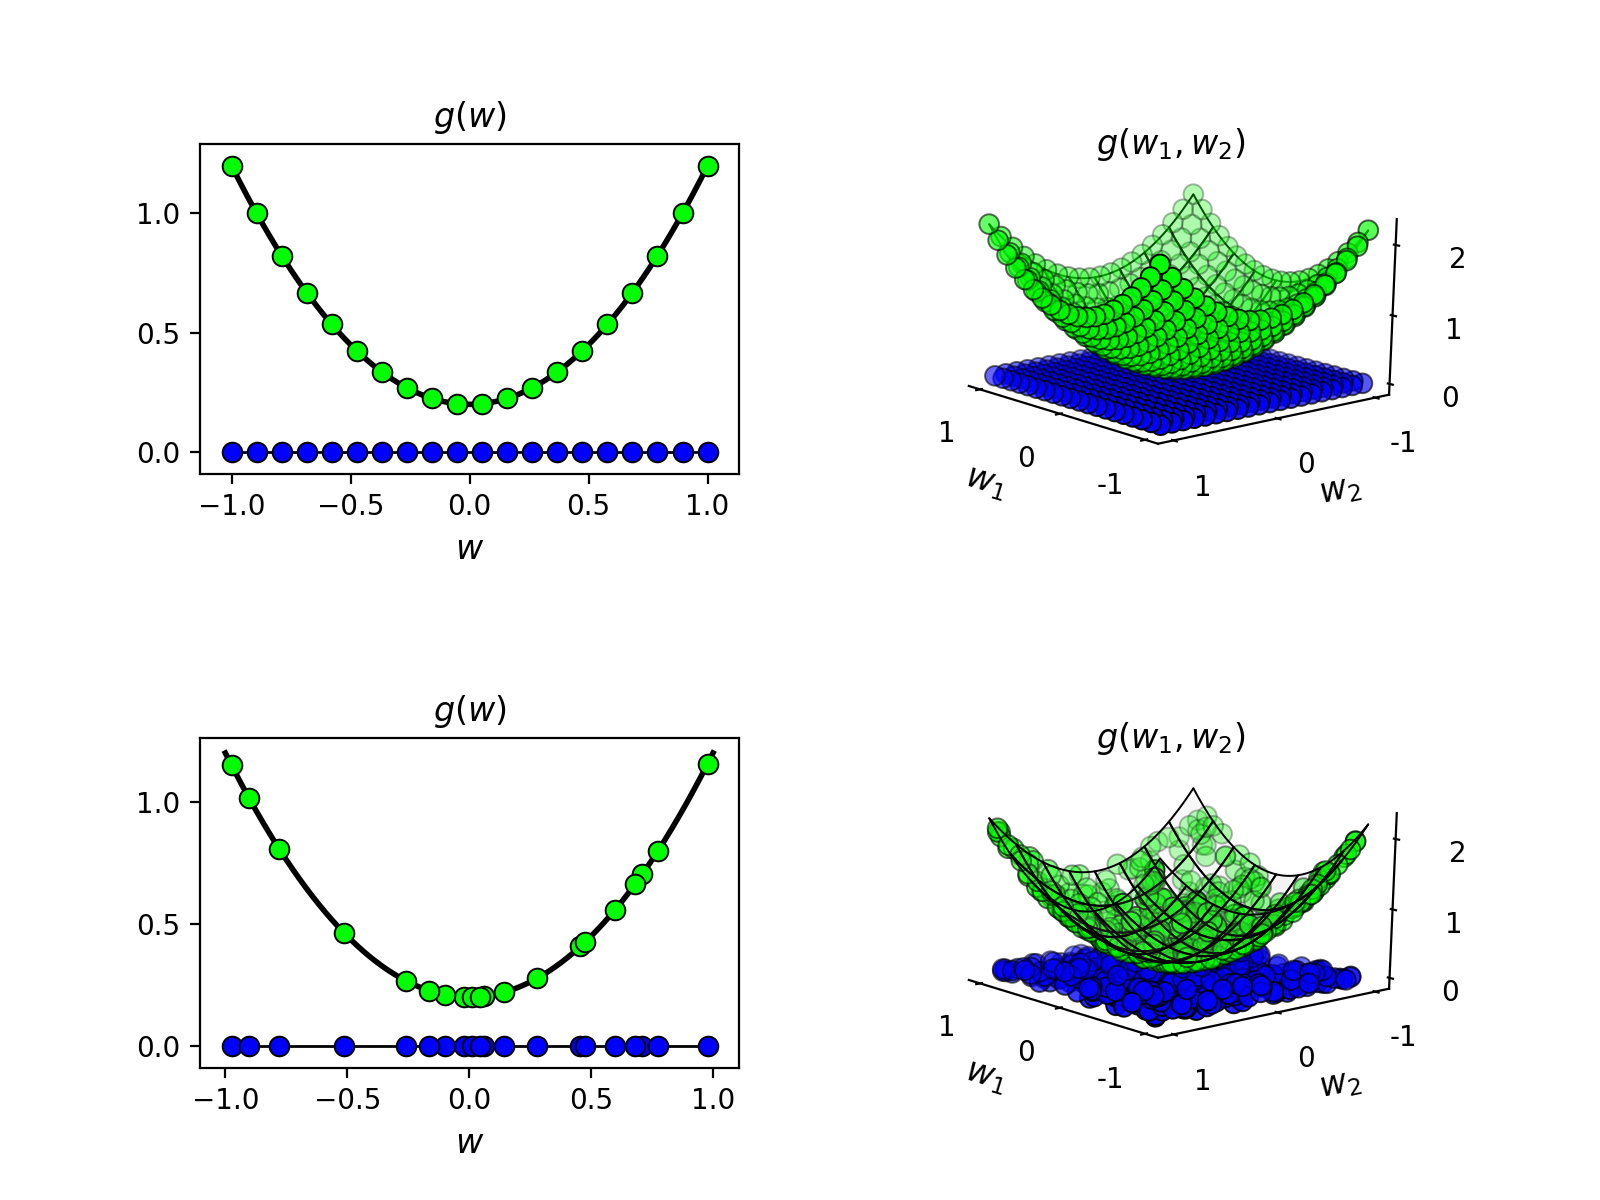

In [3]:
# This code cell will not be shown in the HTML version of this notebook
# define function
func = lambda w: np.dot(w.T,w) + 0.2
num_samples = 20
view = [20,140]

# plot 2d and 3d version, with even grid and randomly selected points
optlib.random_method_experiments.double_plot(func,num_samples,view = view)

- Notice with global optimization we really are employing the simple zero-order optimality condition, from a set of $K$ chosen inputs $\left\{\mathbf{w}^k \right\}_{k=1}^K$ we are choosing the one input $\mathbf{w}^{j}$ lowest on the cost function 

\begin{equation}
g\left(\mathbf{w}^{j}\right) \leq g\left(\mathbf{w}^{k}\right) \,\,\,\,\,\,\,\,\, k=1,...,K
\end{equation}



- This is indeed an approximation to the zero-order optimality condition discussed in the previous Section.

## The curse of dimensionality and the failure of global optimization

- While this sort of zero-order evaluation works fine for low-dimensional functions, regardless of how the input points are chosen, it fails quickly as we try to tackle functions of larger dimensional input.  


- This makes them unusable in modern machine learning since the functions we often deal with have input dimensions ranging from the hundreds to the hundreds of millions.  

- If sampled *uniformly* we need *exponentially* more points to sample an input space as its dimension increases, as illustrated below. 


- Here we sample an input space of dimension $1$, $2$, and $3$, respectively keeping each point a distance $d$ apart (along the coordinate axis).

<img src= "../../mlrefined_images/math_optimization_images/curse_1.png" width="75%" height="100%"/>


- The number of points required to achieve this increases from $3$ to $9$ to $27$ as we increase our input dimension from $1$ to $2$ to $3$.

- This issue is not ameliorated if we take samples randomly.


- Below we illustrate what happens if we take a fixed number of $10$ points and spread them randomly over an input space.


- As the dimension of the input space *increases* the density of our sampling decreases exponentially.

<img src= "../../mlrefined_images/math_optimization_images/curse_2.png" width="75%" height="100%"/>